# Field Study Project Project (Part 4 : Mixed Data Algorithms and Final Choice)
## Athens University of Economics and Business
## MSc in Business Analytics
## Written by : Xheni Cobanaj
## Supervisor : Mr Damianos Chatziantoniou
## Topic : Customer Segmentation of Food Delivery App
### March 2023

In [1]:
pip install gower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.6/414.6 KB 6.7 MB/s eta 0:00:00


In [3]:
pip install hdbscan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=3582103 sha256=f46ea1112e7ae6cd07c976ddf4aca53e244f8305f766ff115075932e6119abc3
  Stored in directory: /root/.cache/pip/wheels/05/6f/88/1a4c04276b98306f00217a1e300e6ba0252c6aa4f7616067ae
Successfully built hdbscan


In [4]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=221bf78859ed2137b62ff8802c3b447e07d65bfb6ca6f77e101e432554e9bdcd
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=b01ca0b02533e1a391bfc3cd73b8be72d4e0f77222fe90453546474f72786e8e
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [5]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# importing all necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML 
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from datetime import datetime
import re
import itertools
from itertools import product
import string
from datetime import datetime
# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import gower
import prince
from prince import mca
import hdbscan
from sklearn.cluster import DBSCAN
# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [7]:
from tqdm import tqdm
from sklearn.preprocessing import PowerTransformer
import umap
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check RAM

In [9]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Read Data

In [10]:
users = pd.read_csv("/content/drive/MyDrive/customers_new.csv",header=0)
print("Columns present in the data: ",[i for i in users.columns])
print("Number of data points: ",users.shape[0])
users.head()

Columns present in the data:  ['customer_id', 'recency', 'monetary', 'num_orders', 'days_active', 'num_shops', 'num_items', 'var_order_items', 'num_cuisines', 'categories', 'city', 'region', 'shop_regions', 'cuisines', 'avg_spent', 'avg_items_per_order', 'avg_num_categories_per_order', 'perc_chain_shops', 'perc_delivered_by_efood', 'perc_has_discount_coupon', 'perc_paid_online', 'perc_from_pinata', 'orders_every_week', 'morning_perc', 'afternoon_perc', 'night_perc', 'ordered_3_days_every_week', 'scores_count', 'leaves_reviews', 'weekend_orders_pct', 'weekday_orders_pct', 'geographical_region_of_user', 'coffee_percentage', 'percentage_with_more_than_2', 'prefecture', 'GDP', 'population', 'income_class', 'household_size2', 'household_size', 'cuisine_diversity', 'avg_shops', 'foodie_label', 'population_segment']
Number of data points:  24998


,customer_id,recency,monetary,num_orders,days_active,num_shops,num_items,var_order_items,num_cuisines,categories,...,prefecture,GDP,population,income_class,household_size2,household_size,cuisine_diversity,avg_shops,foodie_label,population_segment
0,0001496e540173a40362759ed10b3ce2,2,423.40,34,479,17,150,52,2,"['Παγωτά', 'Αναψυκτικά', 'Pepsi 330ml 5€ deals...",...,νοτιος τομεας αθηνων,18127,425112,Average income,Medium Household,Large Household,0.058824,0.500000,Plain Jane/John,Medium
1,0003b7de618c1acfc67eac91b853b287,4,343.35,40,1273,23,99,61,9,"['Καλαμάκια…τα σκέτα', 'Sides', 'Χυμοί', 'Τυλι...",...,νοτιος τομεας αθηνων,18127,425112,Average income,Small Household,Small or Medium Household,0.225000,0.575000,Unadventurous,Medium
2,00045e9d1c96d7e2353f886704e51c88,13,43.80,13,263,4,13,5,3,"['Καφέδες', 'Burgers', 'Club sandwiches']",...,κιλκις,10609,85885,Low income,Single or Couple,Single or Couple,0.230769,0.307692,Plain Jane/John,Very Low
3,000e223791e890e85938d71bee32cf5a,3,122.50,49,501,2,54,5,2,"['Καφέδες', 'Burgers', 'Sandwiches', 'Σαλάτες']",...,λακωνια,11864,87104,Low income,Single or Couple,Single or Couple,0.040816,0.040816,Plain Jane/John,Very Low
4,0016652ea3c3a1176dd2385e89de9ff6,2,456.70,47,1972,23,135,58,7,"['Καλαμάκι κοτόπουλο μπούτι σε πίτα 5€ deals',...",...,νοτιος τομεας αθηνων,18127,425112,Average income,Small or Medium Household,Large Household,0.148936,0.489362,Unadventurous,Medium


In [ ]:
# users['leaves_reviews'] = users['leaves_reviews'].replace({'Mystery Maven': 'MM', 'Silent Shopper': 'SS','Super User': 'SU','Feedback Fanatic': 'FF'})


## Remove sets

In [11]:
# create new DataFrame excluding columns B and C
users1 = users.drop(['categories',"geographical_region_of_user", 'customer_id','cuisines','population','shop_regions','city','region','scores_count','geographical_region_of_user','GDP'], axis=1)

## Separate categorical from numerical for the preprocessing part

In [12]:
# separate categorical and numerical columns
cat_cols = users1.select_dtypes(include=['object','bool']).columns
num_cols = users1.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
#StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way.
# Standard Scaled "mean normalisation"
# scaler = StandardScaler()
# scaler.fit(users1[num_cols])
# print("Feature Means:\t",[f"{x:.2}" for x in scaler.mean_])
# numerical_data = scaler.transform(users1[num_cols])
# numerical_data = pd.DataFrame(numerical_data,index=users1.index,columns=num_cols)
# numerical_data[:2]
# x = pd.concat([numerical_data,users1[cat_cols]],axis=1)


## One hot encoding of categorical variables

In [13]:
df = pd.get_dummies(users1, columns=cat_cols)
df

,recency,monetary,num_orders,days_active,num_shops,num_items,var_order_items,num_cuisines,avg_spent,avg_items_per_order,...,household_size_Small or Medium Household,foodie_label_Adventurous,foodie_label_Foodie,foodie_label_Plain Jane/John,foodie_label_Unadventurous,population_segment_High,population_segment_Low,population_segment_Medium,population_segment_Very High,population_segment_Very Low
0,2,423.40,34,479,17,150,52,2,12.45,4.41,...,0,0,0,1,0,0,0,1,0,0
1,4,343.35,40,1273,23,99,61,9,8.58,2.48,...,1,0,0,0,1,0,0,1,0,0
2,13,43.80,13,263,4,13,5,3,3.37,1.00,...,0,0,0,1,0,0,0,0,0,1
3,3,122.50,49,501,2,54,5,2,2.50,1.10,...,0,0,0,1,0,0,0,0,0,1
4,2,456.70,47,1972,23,135,58,7,9.72,2.87,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,3,223.45,12,1901,11,46,39,7,18.62,3.83,...,0,1,0,0,0,0,0,1,0,0
24994,3,165.15,16,1126,10,61,39,4,10.32,3.81,...,0,0,0,0,1,1,0,0,0,0
24995,3,248.20,15,1265,7,63,35,5,16.55,4.20,...,0,0,0,0,1,0,0,1,0,0
24996,2,133.60,20,1183,8,48,21,6,6.68,2.40,...,0,0,0,0,1,0,0,1,0,0


## Standardization of the numerical features

In [14]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

This is what the final dataset looks like :

In [15]:
scaled_df

,recency,monetary,num_orders,days_active,num_shops,num_items,var_order_items,num_cuisines,avg_spent,avg_items_per_order,...,household_size_Small or Medium Household,foodie_label_Adventurous,foodie_label_Foodie,foodie_label_Plain Jane/John,foodie_label_Unadventurous,population_segment_High,population_segment_Low,population_segment_Medium,population_segment_Very High,population_segment_Very Low
0,-0.617926,1.300688,0.752255,-1.066898,1.284859,1.726832,1.234860,-1.404721,0.466434,1.203971,...,-0.645662,-0.533093,-0.174293,1.829405,-1.039086,-0.376044,-0.440477,1.191024,-0.628039,-0.132610
1,-0.287472,0.785316,1.162665,0.220812,2.386205,0.646791,1.730133,1.618543,-0.344297,-0.520197,...,1.548798,-0.533093,-0.174293,-0.546626,0.962384,-0.376044,-0.440477,1.191024,-0.628039,-0.132610
2,1.199571,-1.143225,-0.684177,-1.417207,-1.101390,-1.174455,-1.351569,-0.972826,-1.435746,-1.842357,...,-0.645662,-0.533093,-0.174293,1.829405,-1.039086,-0.376044,-0.440477,-0.839614,-0.628039,7.540938
3,-0.452699,-0.636544,1.778279,-1.031219,-1.468505,-0.306187,-1.351569,-1.404721,-1.618003,-1.753022,...,-0.645662,-0.533093,-0.174293,1.829405,-1.039086,-0.376044,-0.440477,-0.839614,-0.628039,7.540938
4,-0.617926,1.515078,1.641475,1.354450,2.386205,1.409173,1.565042,0.754753,-0.105477,-0.171790,...,-0.645662,-0.533093,-0.174293,-0.546626,0.962384,-0.376044,-0.440477,1.191024,-0.628039,-0.132610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,-0.452699,0.013385,-0.752578,1.239302,0.183514,-0.475605,0.519465,0.754753,1.758994,0.685827,...,-0.645662,1.875846,-0.174293,-0.546626,-1.039086,-0.376044,-0.440477,1.191024,-0.628039,-0.132610
24994,-0.452699,-0.361958,-0.478972,-0.017593,-0.000044,-0.157946,0.519465,-0.540931,0.020217,0.667960,...,-0.645662,-0.533093,-0.174293,-0.546626,0.962384,2.659263,-0.440477,-0.839614,-0.628039,-0.132610
24995,-0.452699,0.172728,-0.547374,0.207837,-0.550717,-0.115591,0.299343,-0.109036,1.325347,1.016367,...,-0.645662,-0.533093,-0.174293,-0.546626,0.962384,-0.376044,-0.440477,1.191024,-0.628039,-0.132610
24996,-0.617926,-0.565081,-0.205366,0.074849,-0.367159,-0.433251,-0.471082,0.322859,-0.742330,-0.591665,...,-0.645662,-0.533093,-0.174293,-0.546626,0.962384,-0.376044,-0.440477,1.191024,-0.628039,-0.132610


# Gower Distance for pairwise distances of original dataframe. 

Compute GOWER distance metric that can handle both continuous and categorical features and use that as input for the t-SNE embeddings

In [16]:
dist_matrix = gower.gower_matrix(scaled_df)

# t-SNE (t-Distributed Stochastic Neighbor Embedding)

We want to reduce the dimensions in order to be handled by the clustering algorithm and also see if the distance matrix from GOWER can cluster the results approprately

T-SNE Embeddings to perform dimensionality reduction to our data. Number of components was chosen to two in order to be able to visualize the results

The above cell takes a lot of time, therefore it is commented out and the results were saved and loaded in the next cell to save some time!

In [ ]:
#set the hyperparmateres
# keep_dims = 2
# lrn_rate = 300
# prp = 30
# tsne = TSNE(n_components = keep_dims, 
#             perplexity = prp, 
#             random_state = 42,
#             n_iter = 5000,
#             n_jobs = -1)
# #apply it to the data
# X_dimensions = tsne.fit_transform(dist_matrix)
# #check the shape
# X_dimensions.shape

In [ ]:
# X_dimensions

In [ ]:
# save the NumPy array to a file
# np.save('my_array.npy', X_dimensions)

In [17]:
# load the NumPy array from the file
loaded_array = np.load('/content/drive/MyDrive/my_array.npy')

# print the loaded array to verify it was loaded correctly
print(loaded_array)

[[  27.705755   142.51266  ]
 [-205.03767     -0.9236466]
 [ 142.65308     72.59402  ]
 ...
 [  11.455381   -50.616047 ]
 [ -72.49231    -51.80903  ]
 [ -30.938314  -160.98756  ]]


# Hierarchical Clustering

HIERARCHICAL CLUSTERING WITH SINGLE LINKAGE

In [18]:
# Perform agglomerative clustering on the t-SNE embeddings
agg_clustering1 = AgglomerativeClustering(n_clusters=4, linkage='single')
agg_labels1 = agg_clustering1.fit_predict(loaded_array)
# Compute the silhouette score
silhouette_s = silhouette_score(loaded_array, agg_labels1)

# Print the clustering results
print(f'Silhouette Score: {silhouette_s}')
print(f'Agglomerative Clustering Labels: {agg_labels1}')

Silhouette Score: -0.10867352783679962
Agglomerative Clustering Labels: [0 1 0 ... 0 0 0]


In [19]:
davies_bouldin_single = davies_bouldin_score(loaded_array, agg_labels1)
print('Davies-Bouldin score for Hierarchical Clustering with single linkage is:', davies_bouldin_single)

Davies-Bouldin score for Hierarchical Clustering with single linkage is: 0.7067549832390247


In [20]:
# Evaluate the results
calinski_harabasz_single = calinski_harabasz_score(loaded_array, agg_labels1)
print('Calinski-Harabasz score for Hierarchical Clustering with single linkage is:', calinski_harabasz_single)

Calinski-Harabasz score for Hierarchical Clustering with single linkage is: 638.728908373317


In [21]:
# Use Counter to get the count of each value in the array
count_dict = Counter(agg_labels1)

# Convert the dictionary to a list of tuples, where each tuple contains the value and its count
unique_arr_with_count = [(value, count) for value, count in count_dict.items()]

print(unique_arr_with_count)

[(0, 24079), (1, 266), (2, 456), (3, 197)]


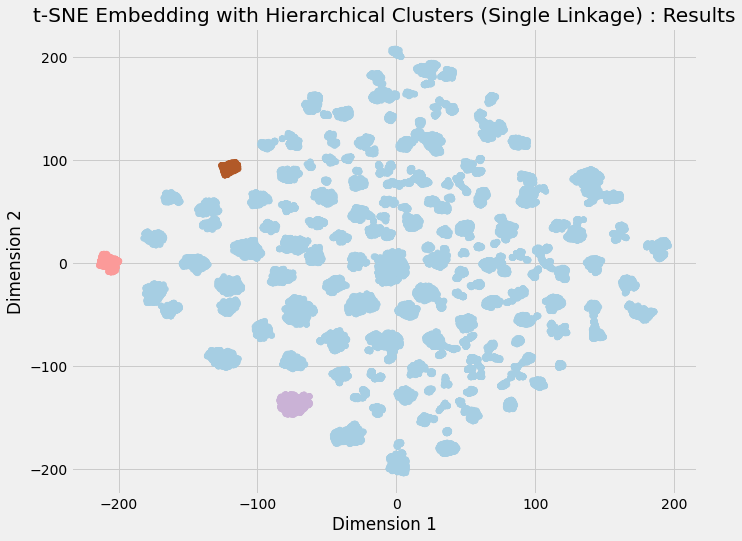

In [22]:
# Plot the clusters on the t-SNE embedding
plt.figure(figsize=(10, 8))
plt.scatter(loaded_array[:, 0], loaded_array[:, 1], c=agg_labels1, cmap='Paired')
# Add a legend and a title
plt.title('t-SNE Embedding with Hierarchical Clusters (Single Linkage) : Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

HIERARCHICAL CLUSTERING WITH WARD LINKAGE

In [23]:
# Perform agglomerative clustering on the t-SNE embeddings
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg_clustering.fit_predict(loaded_array)

In [24]:
# Compute the silhouette score
silhouette = silhouette_score(loaded_array, agg_labels)

# Print the clustering results
print(f'Silhouette Score: {silhouette}')
print(f'Agglomerative Clustering Labels: {agg_labels}')

Silhouette Score: 0.33904004096984863
Agglomerative Clustering Labels: [1 3 0 ... 2 2 2]


In [25]:
davies_bouldin_ward = davies_bouldin_score(loaded_array, agg_labels)
print('Davies-Bouldin score for Hierarchical Clustering with ward linkage is:', davies_bouldin_ward)

Davies-Bouldin score for Hierarchical Clustering with ward linkage is: 0.8998836501822951


In [26]:
# Evaluate the results
calinski_harabasz_ward = calinski_harabasz_score(loaded_array, agg_labels)
print('Calinski-Harabasz score for Hierarchical Clustering with average linkage is:', calinski_harabasz_ward)

Calinski-Harabasz score for Hierarchical Clustering with average linkage is: 18024.1926466077


In [27]:
# Use Counter to get the count of each value in the array
count_dict = Counter(agg_labels)

# Convert the dictionary to a list of tuples, where each tuple contains the value and its count
unique_arr_with_count = [(value, count) for value, count in count_dict.items()]

print(unique_arr_with_count)

[(1, 4387), (3, 4227), (0, 7597), (2, 8787)]


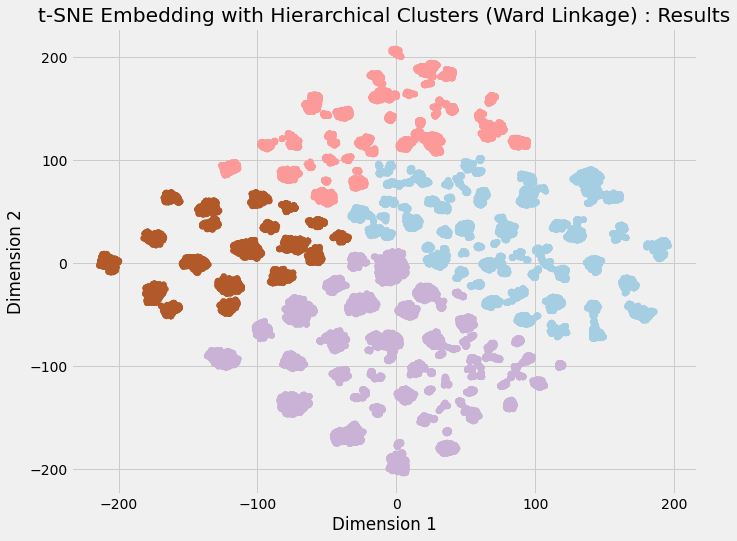

In [28]:
# Plot the clusters on the t-SNE embedding
plt.figure(figsize=(10, 8))
plt.scatter(loaded_array[:, 0], loaded_array[:, 1], c=agg_labels, cmap='Paired')
# Add a legend and a title
plt.title('t-SNE Embedding with Hierarchical Clusters (Ward Linkage) : Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

SINGLE LINKAGE AND HIERARCHICAL DO NOT WORK FOR THIS DATA, WE HAVE A NEGATIVE VALUE

HIERARCHICAL CLUSTERING WITH AVERAGE LINKAGE

In [29]:
# Cluster the data using hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=4,linkage='average').fit(loaded_array)
hierarchical_labels=hierarchical.fit_predict(loaded_array)
# Compute the silhouette score
silhouette2 = silhouette_score(loaded_array, hierarchical_labels)
# Print the clustering results
print(f'Silhouette Score: {silhouette2}')
print(f'Agglomerative Clustering Labels: {hierarchical_labels}')

Silhouette Score: 0.34442105889320374
Agglomerative Clustering Labels: [1 3 0 ... 0 3 2]


In [30]:
# Use Counter to get the count of each value in the array
count_dict = Counter(hierarchical_labels)

# Convert the dictionary to a list of tuples, where each tuple contains the value and its count
unique_arr_with_count = [(value, count) for value, count in count_dict.items()]

print(unique_arr_with_count)

[(1, 5893), (3, 4976), (0, 9762), (2, 4367)]


Save results for the dashboards

In [31]:
users_df=users.copy()
users_df['Cluster']=hierarchical_labels
users_df.to_csv('users_df.csv', index=False, float_format='%.2f', sep=';')

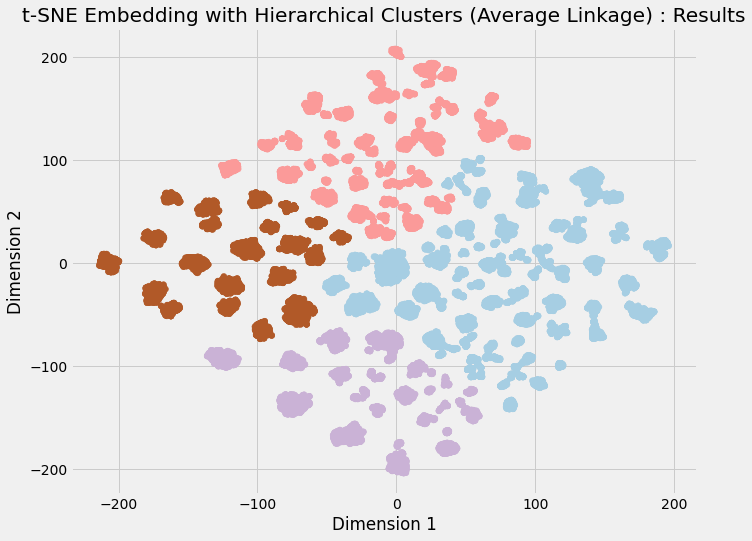

In [32]:
# Plot the clusters on the t-SNE embedding
plt.figure(figsize=(10, 8))
plt.scatter(loaded_array[:, 0], loaded_array[:, 1], c=hierarchical_labels, cmap='Paired')
# Add a legend and a title
plt.title('t-SNE Embedding with Hierarchical Clusters (Average Linkage) : Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Save results

In [ ]:
# cust_df['Cluster']=clusters_proto_umap2
# cust_df.to_csv('cust_df.csv', index=False, float_format='%.2f', sep=';')

In [33]:
# Evaluate the results
silhouette4 = silhouette_score(loaded_array, hierarchical_labels)
print('Silhouette scorefor Hierarchical Clustering with average linkage is:', silhouette4)

Silhouette scorefor Hierarchical Clustering with average linkage is: 0.34442106


In [34]:
davies_bouldin = davies_bouldin_score(loaded_array, hierarchical_labels)
print('Davies-Bouldin score for Hierarchical Clustering with average linkage is:', davies_bouldin)

Davies-Bouldin score for Hierarchical Clustering with average linkage is: 0.8651785299595751


In [35]:
# Evaluate the results
calinski_harabasz = calinski_harabasz_score(loaded_array, hierarchical_labels)
print('Calinski-Harabasz score for Hierarchical Clustering with average linkage is:', calinski_harabasz)

Calinski-Harabasz score for Hierarchical Clustering with average linkage is: 18234.1148186152


HIERARCHICAL CLUSTERING WITH COMPLETE LINKAGE

In [36]:
# Cluster the data using hierarchical clustering
hierarchical2 = AgglomerativeClustering(n_clusters=4,linkage='complete').fit(loaded_array)
hierarchical_labels2=hierarchical2.fit_predict(loaded_array)
# Compute the silhouette score
silhouette3 = silhouette_score(loaded_array, hierarchical_labels2)
# Print the clustering results
print(f'Silhouette Score: {silhouette3}')
print(f'Agglomerative Clustering Labels: {hierarchical_labels2}')

Silhouette Score: 0.3404872715473175
Agglomerative Clustering Labels: [3 2 1 ... 0 0 0]


In [37]:
davies_bouldin_complete = davies_bouldin_score(loaded_array, hierarchical_labels2)
print('Davies-Bouldin score for Hierarchical Clustering with complete linkage is:', davies_bouldin_complete)

Davies-Bouldin score for Hierarchical Clustering with complete linkage is: 0.8431597603376888


In [38]:
# Evaluate the results
calinski_harabasz_complete= calinski_harabasz_score(loaded_array, hierarchical_labels2)
print('Calinski-Harabasz score for Hierarchical Clustering with complete linkage is:', calinski_harabasz_complete)

Calinski-Harabasz score for Hierarchical Clustering with complete linkage is: 18044.426824266746


In [40]:
# Use Counter to get the count of each value in the array
count_dict = Counter(hierarchical_labels2)

# Convert the dictionary to a list of tuples, where each tuple contains the value and its count
unique_arr_with_count = [(value, count) for value, count in count_dict.items()]

print(unique_arr_with_count)

[(3, 5284), (2, 4818), (1, 4489), (0, 10407)]


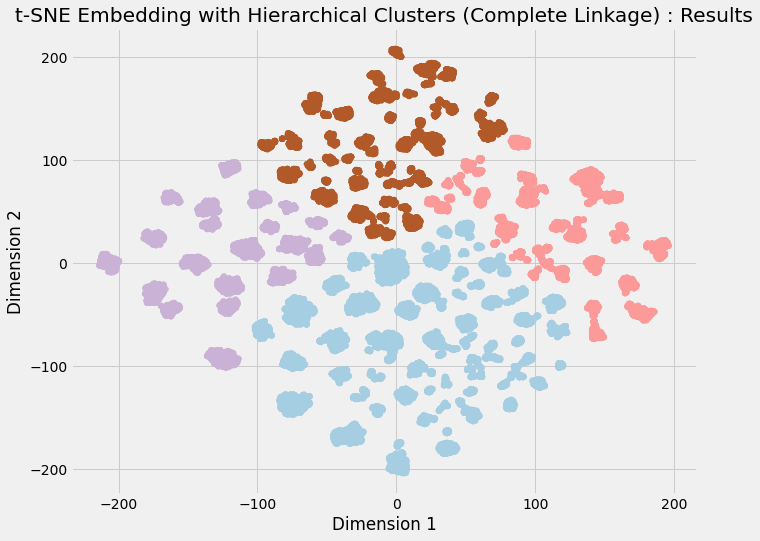

In [39]:
# Plot the clusters on the t-SNE embedding
plt.figure(figsize=(10, 8))
plt.scatter(loaded_array[:, 0], loaded_array[:, 1], c=hierarchical_labels2, cmap='Paired')
# Add a legend and a title
plt.title('t-SNE Embedding with Hierarchical Clusters (Complete Linkage) : Results')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Distance matrix with complete linkage

In [ ]:
model_dist = AgglomerativeClustering(n_clusters=5, metric="precomputed", linkage="complete")
model_dist = model_dist.fit(dist_matrix)
cluster_dist=model_dist.labels_

In [ ]:
# Evaluate the results
silhouette_dist = silhouette_score(dist_matrix, cluster_dist)
print('Silhouette score for Hierarchical Clustering on distance matrix with complete linkage is:', silhouette_dist)

Silhouette score for Hierarchical Clustering on distance matrix with complete linkage is: 0.11556634


Distance matrix with average linkage

In [ ]:
model_dist1 = AgglomerativeClustering(n_clusters=5, metric="precomputed", linkage="average")
model_dist1 = model_dist1.fit(dist_matrix)
cluster_dist1=model_dist1.labels_

In [ ]:
# Evaluate the results
silhouette_dist1 = silhouette_score(dist_matrix, cluster_dist1)
# print('Silhouette score for Hierarchical Clustering on distance matrix with complete linkage is:', silhouette_dist1)

In [ ]:
print('Silhouette score for Hierarchical Clustering on distance matrix with average linkage is:', silhouette_dist1)

Silhouette score for Hierarchical Clustering on distance matrix with average linkage is: 0.08343471


# Scipy clustering with dendrograms

In [ ]:
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram

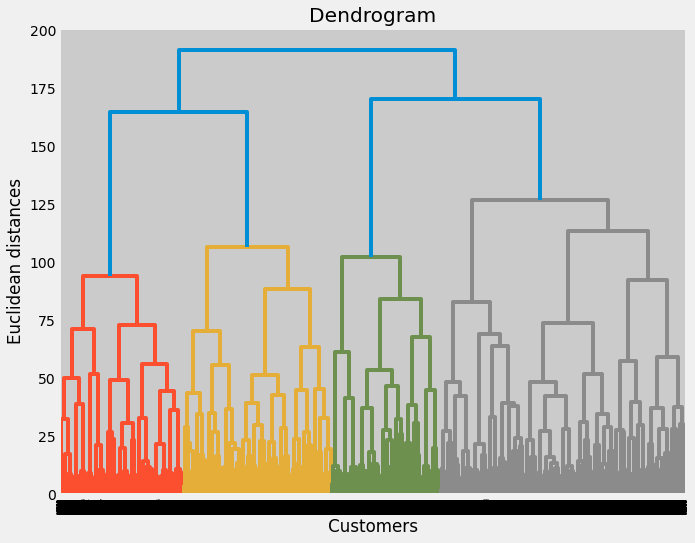

In [ ]:
plt.figure(figsize=(10, 8))
dendrogram = sch.dendrogram(sch.linkage(loaded_array, method = 'average')) # finding the optimal number of clusters using dendrogram
plt.title('Dendrogram') # title of the dendrogram
plt.xlabel('Customers') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.show() 

Silhouette score: 0.45934016


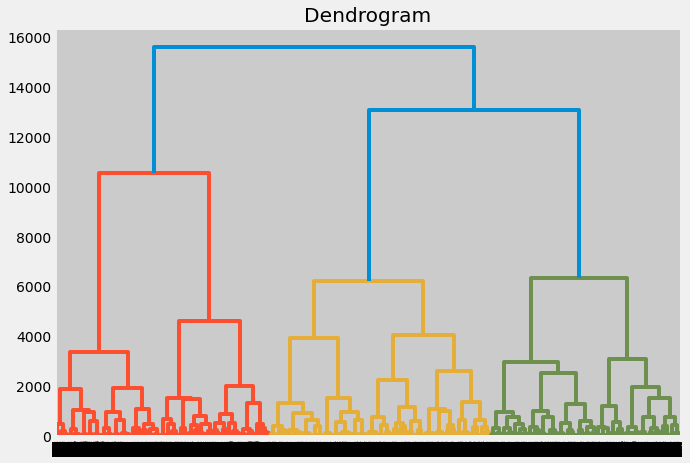

In [ ]:
# Perform hierarchical clustering
linkage_matrix = sch.linkage(loaded_array, method='ward')
labels_scipy = sch.fcluster(linkage_matrix, t=5, criterion='distance')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = sch.dendrogram(linkage_matrix)

# Calculate the silhouette score
silhouette_avg_scipy = silhouette_score(loaded_array, labels_scipy)
print("Silhouette score:", silhouette_avg_scipy)

In [ ]:
from collections import Counter
counts_s = Counter(labels_scipy)
print(counts_s)

Counter({500: 32, 1690: 32, 1785: 31, 336: 30, 1138: 29, 1666: 29, 808: 29, 1868: 28, 2087: 28, 1259: 27, 1522: 27, 1399: 27, 2063: 27, 1218: 26, 333: 26, 1865: 26, 1396: 26, 1534: 26, 1299: 26, 1580: 26, 1241: 26, 617: 26, 1727: 25, 1188: 25, 2005: 25, 1402: 25, 1219: 25, 1480: 25, 1843: 24, 1758: 24, 2101: 24, 2058: 24, 1702: 24, 568: 24, 1515: 23, 1701: 23, 1239: 23, 1240: 23, 1943: 23, 315: 23, 515: 23, 1733: 23, 1405: 23, 1862: 22, 1426: 22, 385: 22, 516: 22, 811: 22, 1213: 22, 190: 22, 393: 22, 1797: 22, 1202: 22, 1691: 22, 2132: 22, 1100: 22, 764: 22, 429: 21, 1223: 21, 1584: 21, 1592: 21, 1696: 21, 1511: 21, 2133: 21, 1519: 21, 2066: 21, 317: 21, 2082: 21, 427: 21, 309: 21, 1593: 21, 108: 21, 1546: 21, 597: 21, 768: 21, 1719: 21, 1842: 21, 1484: 21, 1207: 21, 750: 21, 1260: 21, 1762: 21, 2138: 21, 1407: 21, 576: 21, 565: 21, 564: 21, 504: 21, 578: 21, 1828: 21, 1941: 20, 1448: 20, 1624: 20, 1015: 20, 2070: 20, 923: 20, 1711: 20, 2089: 20, 903: 20, 1544: 20, 1698: 20, 1744: 20, 

In [ ]:
from prince import FAMD
from sklearn.manifold import MDS

In [ ]:
# mca = MCA()
# mca = mca.fit(scaled_df) # same as calling ca.fs_r(1)
# mca = mca.transform(scaled_df) # same as calling ca.fs_r_sup(df_new) for *another* test set.
# print(mca)
# mca.plot_coordinates(
#      X=X,
#      ax=None,
#      figsize=(6, 6),
#      show_row_points=True,
#      row_points_size=10,
#      show_row_labels=False,
#      show_column_points=True,
#      column_points_size=30,
#      show_column_labels=False,
#      legend_n_cols=1
#      )

In [ ]:
# # Apply MDS to obtain coordinates in 2D space
# mds = MDS(n_components=2, dissimilarity='precomputed')
# coords = mds.fit_transform(dist_matrix)

# # Create a synthetic data set with coordinates and labels
# data = pd.DataFrame(data=np.hstack((coords, np.array(['Label']*len(coords)).reshape(-1,1))),
#                     columns=['X', 'Y', 'Label'])

# # Perform FAMD on the synthetic data set
# famd = FAMD(n_components=2)
# famd.fit(data)

# # Plot the factor map
# fig, ax = plt.subplots(figsize=(8, 8))
# ax.scatter(famd.row_coordinates_['X'], famd.row_coordinates_['Y'], c=data['Label'])
# ax.set_xlabel('Factor 1')
# ax.set_ylabel('Factor 2')
# ax.set_title('FAMD Visualization')
# plt.show()

#t-SNE WITH 3 COMPONENTS

In [ ]:
#set the hyperparmateres
tsne2 = TSNE(n_components = 3, 
            perplexity = 30, 
            random_state = 42,
            n_iter = 1000,
            n_jobs = -1)
#apply it to the data
X_dimensions_tsne = tsne2.fit_transform(dist_matrix)
#check the shape
X_dimensions_tsne.shape

(24998, 3)

In [ ]:
# Cluster the data using hierarchical clustering
hierarchical4 = AgglomerativeClustering(n_clusters=4,linkage='average').fit(X_dimensions_tsne)
hierarchical_labels4=hierarchical4.fit_predict(X_dimensions_tsne)
# Compute the silhouette score
silhouette5 = silhouette_score(X_dimensions_tsne, hierarchical_labels4)
# Print the clustering results
print(f'Silhouette Score: {silhouette5}')
print(f'Agglomerative Clustering Labels: {hierarchical_labels4}')

Silhouette Score: 0.2168949693441391
Agglomerative Clustering Labels: [0 1 3 ... 0 3 2]


In [ ]:
# Use Counter to get the count of each value in the array
count_dict = Counter(hierarchical_labels4)

# Convert the dictionary to a list of tuples, where each tuple contains the value and its count
unique_arr_with_count = [(value, count) for value, count in count_dict.items()]

print(unique_arr_with_count)

[(0, 8423), (1, 5309), (3, 5297), (2, 5969)]


In [ ]:
# Cluster the data using hierarchical clustering
hierarchical5 = AgglomerativeClustering(n_clusters=4,linkage='ward').fit(X_dimensions_tsne)
hierarchical_labels5=hierarchical5.fit_predict(X_dimensions_tsne)
# Compute the silhouette score
silhouette6= silhouette_score(X_dimensions_tsne, hierarchical_labels5)
# Print the clustering results
print(f'Silhouette Score: {silhouette6}')
print(f'Agglomerative Clustering Labels: {hierarchical_labels5}')

Silhouette Score: 0.21397802233695984
Agglomerative Clustering Labels: [3 2 1 ... 3 1 0]


In [ ]:
# Cluster the data using hierarchical clustering
hierarchical6 = AgglomerativeClustering(n_clusters=4,linkage='single').fit(X_dimensions_tsne)
hierarchical_labels6=hierarchical6.fit_predict(X_dimensions_tsne)
# Compute the silhouette score
silhouette7= silhouette_score(X_dimensions_tsne, hierarchical_labels6)
# Print the clustering results
print(f'Silhouette Score: {silhouette7}')
print(f'Agglomerative Clustering Labels: {hierarchical_labels6}')

Silhouette Score: -0.16061215102672577
Agglomerative Clustering Labels: [0 0 0 ... 0 0 0]


In [ ]:
# Cluster the data using hierarchical clustering
hierarchical6 = AgglomerativeClustering(n_clusters=4,linkage='complete').fit(X_dimensions_tsne)
hierarchical_labels6=hierarchical6.fit_predict(X_dimensions_tsne)
# Compute the silhouette score
silhouette7= silhouette_score(X_dimensions_tsne, hierarchical_labels6)
# Print the clustering results
print(f'Silhouette Score: {silhouette7}')
print(f'Agglomerative Clustering Labels: {hierarchical_labels6}')

Silhouette Score: 0.1835654079914093
Agglomerative Clustering Labels: [1 2 0 ... 0 2 2]


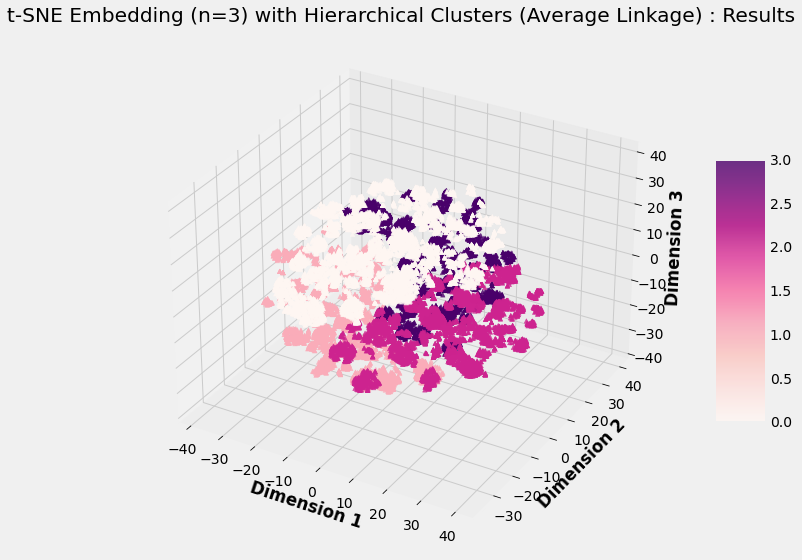

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d 
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('RdPu')
 
# Creating plot
sctt = ax.scatter3D(X_dimensions_tsne[:, 0], X_dimensions_tsne[:, 1], X_dimensions_tsne[:, 2],
                    alpha = 0.8,
                    c =hierarchical_labels4,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("t-SNE Embedding (n=3) with Hierarchical Clusters (Average Linkage) : Results")
ax.set_xlabel('Dimension 1', fontweight ='bold')
ax.set_ylabel('Dimension 2', fontweight ='bold')
ax.set_zlabel('Dimension 3', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

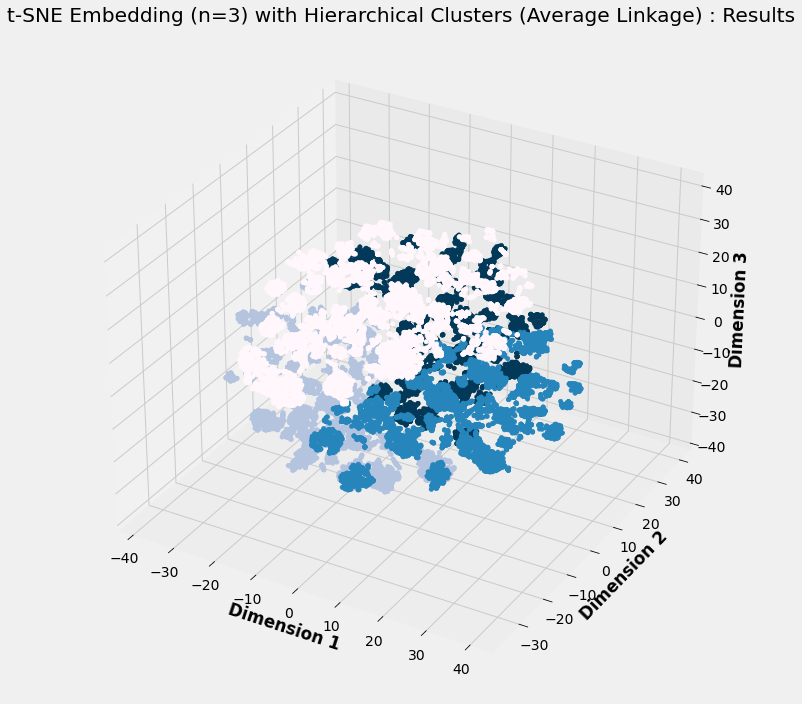

In [ ]:
plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_dimensions_tsne[:, 0], X_dimensions_tsne[:, 1], X_dimensions_tsne[:, 2],
                    c = hierarchical_labels4, alpha=1,cmap='PuBu')
 
plt.title("t-SNE Embedding (n=3) with Hierarchical Clusters (Average Linkage) : Results")
ax.set_xlabel('Dimension 1', fontweight ='bold')
ax.set_ylabel('Dimension 2', fontweight ='bold')
ax.set_zlabel('Dimension 3', fontweight ='bold')
plt.show()

# HDBSCAN

In [ ]:
# # cast the dist_matrix array to a double array
# dist_matrix2 = dist_matrix.astype(np.double)

# eps_values = [0.1, 0.2, 0.3]
# min_samples_values = [10, 30, 40]

# for eps in eps_values:
#     for min_samples in min_samples_values:
#         db = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = db.fit_predict(X_dimensions)
#         db_score = davies_bouldin_score(X_dimensions, labels)
#         print(f"ε={eps}, MinPts={min_samples}, DB score={db_score}")

In [ ]:
# eps_values = [0.1, 0.2, 0.3]
# min_samples_values = [10, 30, 40]

# for eps in eps_values:
#     for min_samples in min_samples_values:
#         db = DBSCAN(eps=eps, min_samples=min_samples)
#         labels = db.fit_predict(X_dimensions)
#         db_score = davies_bouldin_score(X_dimensions, labels)
#         print(f"ε={eps}, MinPts={min_samples}, DB score={db_score}")


In [ ]:
# db = DBSCAN(eps=23, min_samples=12)
# labels_db = db.fit_predict(X_dimensions)

In [ ]:
# labels_db

In [ ]:
# # Use Counter to get the count of each value in the array
# count_dict = Counter(clusterer.labels_)

# # Convert the dictionary to a list of tuples, where each tuple contains the value and its count
# unique_arr_with_count = [(value, count) for value, count in count_dict.items()]

# print(unique_arr_with_count)

In [ ]:
# pd.set_option('display.max_columns', None)
# scaled_df

In [ ]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
# clusterer.fit(X_dimensions)
# clusterer.labels_

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# clustering_db = DBSCAN(eps=0.4, min_samples=1)
# clustering_db.fit(X_dimensions)

In [ ]:
# dbscan_model = clustering_db.fit_predict(X_dimensions)

In [ ]:
# # Apply HDBSCAN clustering to the scaled data
# clusterer = hdbscan.HDBSCAN(min_cluster_size=4)
# labels = clusterer.fit_predict(dist_matrix)

In [ ]:
# dbscan = DBSCAN(metric='precomputed').fit(dist_matrix)


#K-prototypes

The k prototypes algorithm handles raw categorical data therefore we will be using the df users1 only with scaling

In [41]:
scaler_kp = StandardScaler()
scaled_kp_df = scaler_kp.fit_transform(users1[num_cols])
scaled_kp_df = pd.DataFrame(scaled_kp_df,index=users1.index,columns=num_cols)
kproto_df= pd.concat([scaled_kp_df,users1[cat_cols]],axis=1)

In [43]:
kproto = KPrototypes(n_clusters=4,verbose=2,n_jobs=-1,random_state=42,init='Cao',n_init=5)
cluster_kproto = kproto.fit_predict(kproto_df,categorical=[kproto_df.columns.get_loc(col) for col in cat_cols])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 3


In [44]:
#Prints the count of each cluster group
pd.Series(cluster_kproto).value_counts()

2    9325
3    6198
0    6181
1    3294
dtype: int64

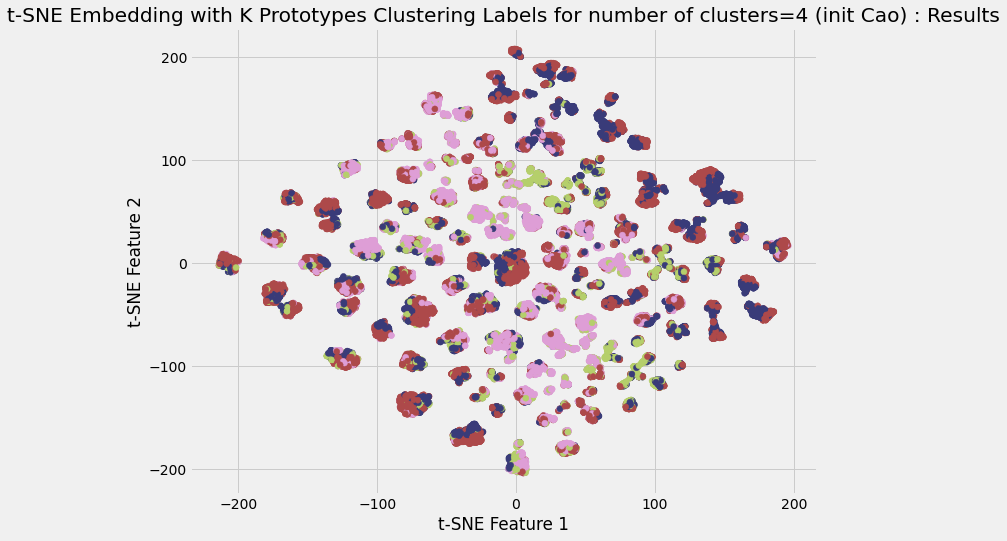

In [45]:
# Plot the clusters on the t-SNE embedding
plt.figure(figsize=(10, 8))
plt.scatter(loaded_array[:, 0], loaded_array[:, 1], c=cluster_kproto, cmap='tab20b')
plt.title('t-SNE Embedding with K Prototypes Clustering Labels for number of clusters=4 (init Cao) : Results')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [46]:
# Get the clustering cost
cost = kproto.cost_
print("Clustering Cost: {:.2f}".format(cost))

Clustering Cost: 514773.35


Lets try how the clustering algorithm works for 5 clusters

In [47]:
kproto1 = KPrototypes(n_clusters=5,verbose=2,n_jobs=-1,random_state=42,init='Cao',n_init=5)
cluster_kproto1 = kproto1.fit_predict(kproto_df,categorical=[kproto_df.columns.get_loc(col) for col in cat_cols])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 4


In [48]:
# Get the clustering cost
cost1 = kproto1.cost_
print("Clustering Cost: {:.2f}".format(cost1))

Clustering Cost: 495026.02


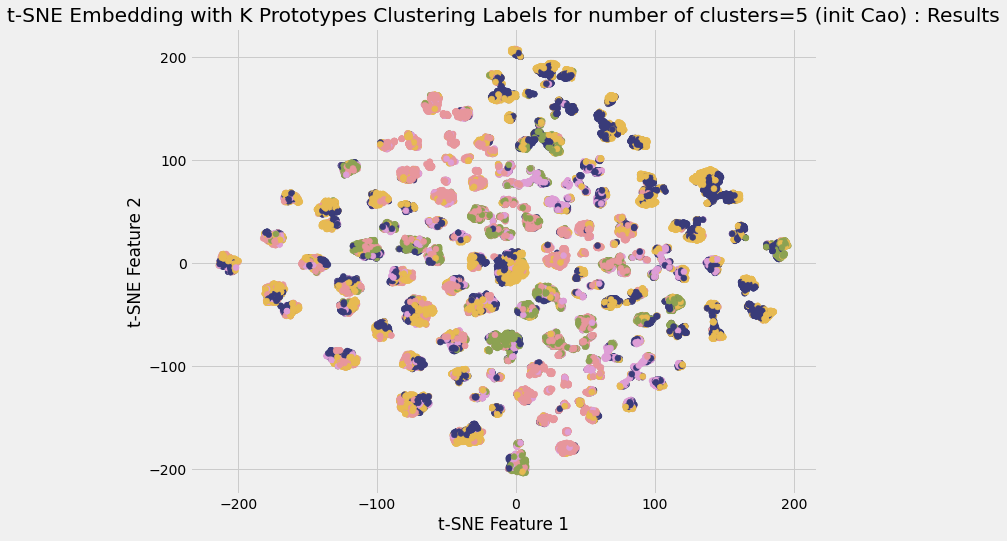

In [49]:
# Visualize the clustering results
plt.figure(figsize=(10, 8))
plt.scatter(loaded_array[:, 0], loaded_array[:, 1], c=cluster_kproto1, cmap='tab20b')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Embedding with K Prototypes Clustering Labels for number of clusters=5 (init Cao) : Results')
plt.show()

In [50]:
pd.Series(cluster_kproto1).value_counts()

2    7459
0    5811
3    5735
1    3063
4    2930
dtype: int64

##K-prototypes with random initialization


In [51]:
kproto2 = KPrototypes(n_clusters=4,verbose=2,n_jobs=-1,random_state=42,init='random',n_init=5,)
cluster_kproto2 = kproto2.fit_predict(kproto_df,categorical=[kproto_df.columns.get_loc(col) for col in cat_cols])

Best run was number 2


In [52]:
pd.Series(cluster_kproto2).value_counts()

0    9372
1    6171
3    6168
2    3287
dtype: int64

In [53]:
# Get the clustering cost
cost2 = kproto2.cost_
print("Clustering Cost: {:.2f}".format(cost2))

Clustering Cost: 514780.00


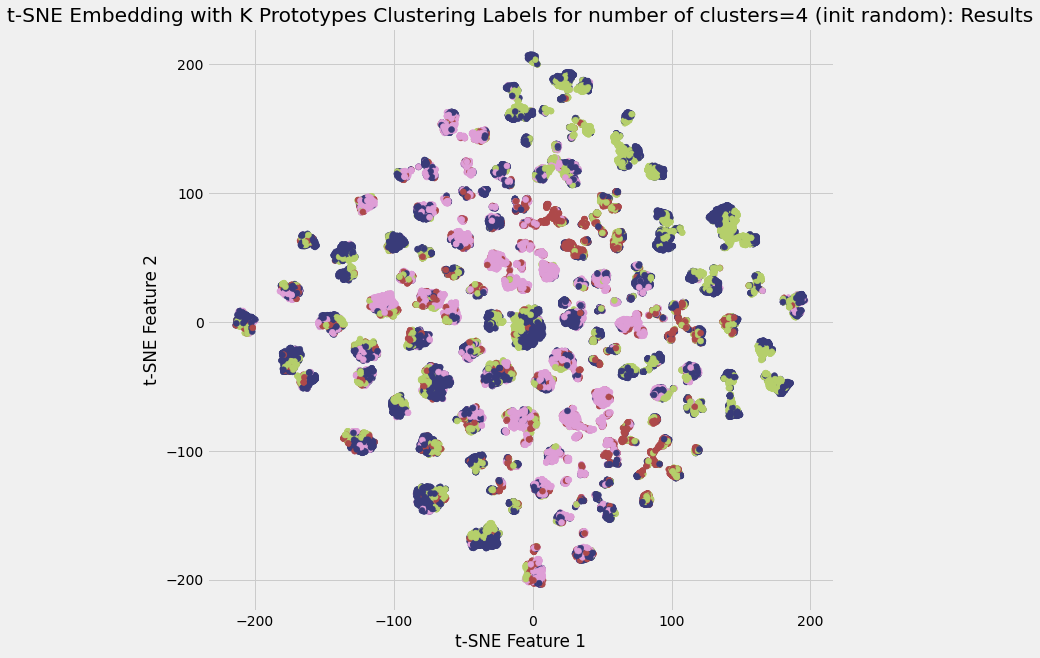

In [54]:
# Visualize the clustering results
plt.figure(figsize=(10, 10))
plt.scatter(loaded_array[:, 0], loaded_array[:, 1], c=cluster_kproto2, cmap='tab20b')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Embedding with K Prototypes Clustering Labels for number of clusters=4 (init random): Results')
plt.show()

##K-prototypes with Huang initialization

In [55]:
kproto3 = KPrototypes(n_clusters=4,verbose=2,n_jobs=-1,random_state=42,init='Huang',n_init=5,)
cluster_kproto3 = kproto3.fit_predict(kproto_df,categorical=[kproto_df.columns.get_loc(col) for col in cat_cols])

Best run was number 3


In [56]:
pd.Series(cluster_kproto3).value_counts()

2    9324
1    6201
0    6183
3    3290
dtype: int64

In [57]:
# Get the clustering cost
cost3 = kproto3.cost_
print("Clustering Cost: {:.2f}".format(cost3))

Clustering Cost: 514773.30


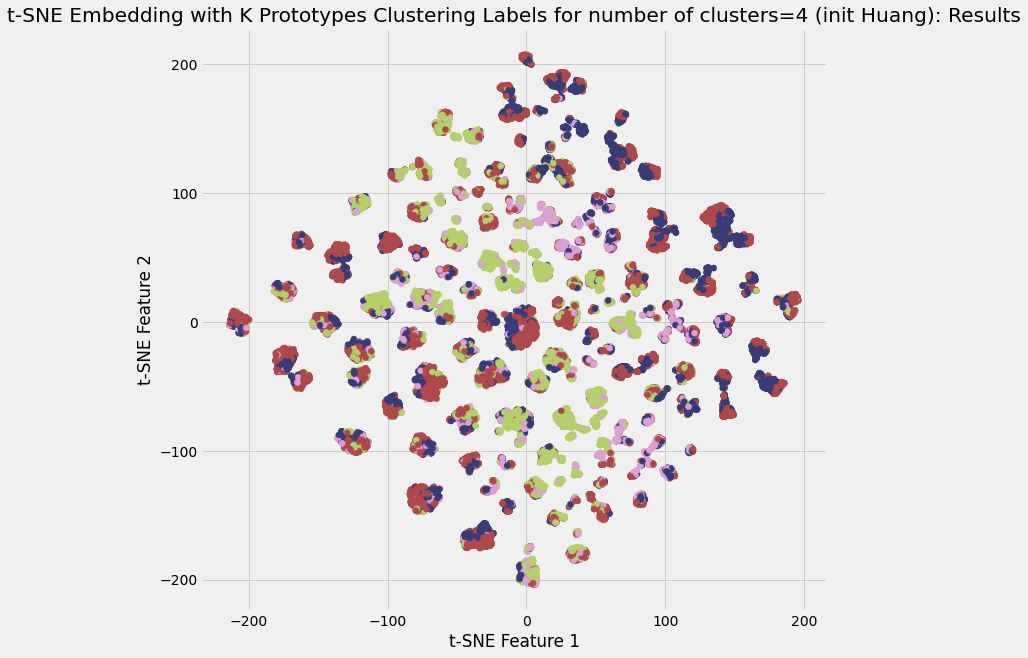

In [58]:
# Visualize the clustering results
plt.figure(figsize=(10, 10))
plt.scatter(loaded_array[:, 0], loaded_array[:, 1], c=cluster_kproto3, cmap='tab20b')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Embedding with K Prototypes Clustering Labels for number of clusters=4 (init Huang): Results')
plt.show()

In [59]:
# x['Cluster']=cluster
# x

In [60]:
# df2=users1.copy()
# df2

In [61]:
# df2['cluster']=cluster

In [62]:
# df2.to_csv('data_segments.csv', index=False, float_format='%.2f', sep=';')


# UMAP Embeddings

In [63]:
import umap.umap_ as umap

In [64]:
#Preprocessing numerical
numerical = users1.select_dtypes(exclude=['object','bool'])

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = users1.select_dtypes(include=['object','bool'])
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(users1.select_dtypes(include=['object','bool']).columns) / users1.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

In [65]:
categorical

,orders_every_week,ordered_3_days_every_week,leaves_reviews_Feedback Fanatic,leaves_reviews_Mystery Maven,leaves_reviews_Occasional,leaves_reviews_Silent Shopper,leaves_reviews_Super User,prefecture_αιτωλοακαρνανια,prefecture_ανατολικη αττικη,prefecture_αργολιδα,...,household_size_Small or Medium Household,foodie_label_Adventurous,foodie_label_Foodie,foodie_label_Plain Jane/John,foodie_label_Unadventurous,population_segment_High,population_segment_Low,population_segment_Medium,population_segment_Very High,population_segment_Very Low
0,True,False,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,False,False,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
2,False,False,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,False,False,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,False,False,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,False,False,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
24994,False,False,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
24995,False,False,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
24996,False,False,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [66]:
categorical_weight

0.2647058823529412

In [67]:
fit1

UMAP(metric='l2', tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [68]:
fit2

UMAP(angular_rp_forest=True, metric='dice', tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [69]:
#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False,densmap_kwds={},output_dens=False)

Text(0.5, 1.0, 'UMAP projection of customers data')

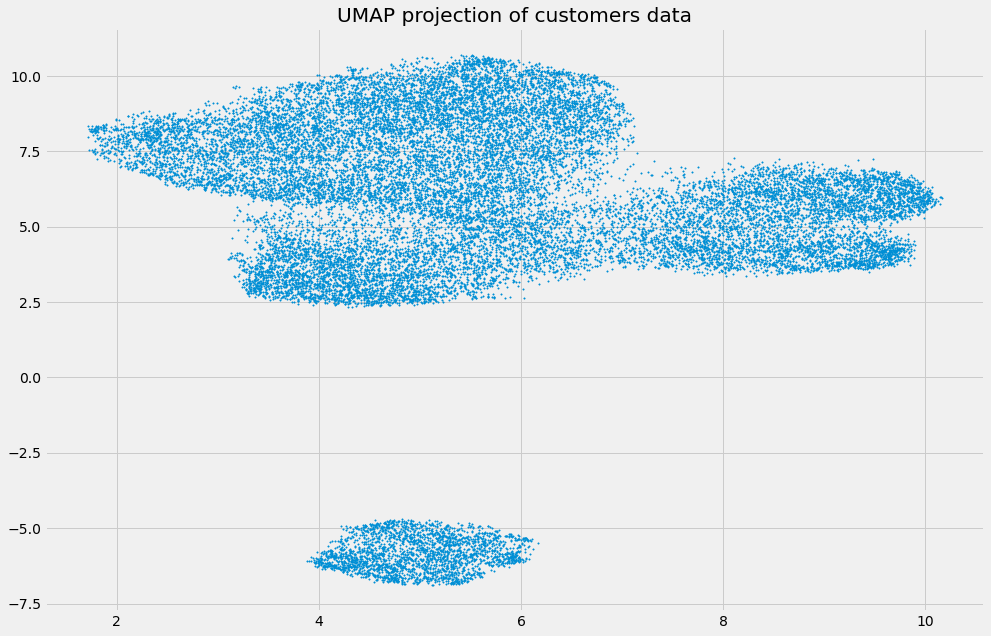

In [70]:
plt.figure(figsize=(15, 10))
plt.scatter(*np.array(embedding)[0].T, s=2, cmap='RdPu', alpha=1.0)
plt.title('UMAP projection of customers data')

In [71]:
kproto_data = users1.copy()
for c in users1.select_dtypes(exclude=['object','bool']).columns:
    pt = PowerTransformer()
    kproto_data[c] =  pt.fit_transform(np.array(kproto_data[c]).reshape(-1, 1))

In [72]:
kproto_data

,recency,monetary,num_orders,days_active,num_shops,num_items,var_order_items,num_cuisines,avg_spent,avg_items_per_order,...,coffee_percentage,percentage_with_more_than_2,prefecture,income_class,household_size2,household_size,cuisine_diversity,avg_shops,foodie_label,population_segment
0,-1.180705,1.382045,1.092888,-1.039488,1.286128,1.594008,1.276117,-1.696418,0.660085,1.250686,...,-1.435013,0.473119,νοτιος τομεας αθηνων,Average income,Medium Household,Large Household,-1.972289,0.106548,Plain Jane/John,Medium
1,0.144910,1.044293,1.332027,0.270809,1.939924,0.960399,1.588721,1.494998,-0.194070,-0.439075,...,0.316497,-0.394937,νοτιος τομεας αθηνων,Average income,Small Household,Small or Medium Household,-0.247322,0.461654,Unadventurous,Medium
2,1.488893,-2.494501,-0.838912,-1.456788,-1.401330,-2.890829,-2.386130,-1.016001,-2.200840,-3.196347,...,0.118234,-1.633001,κιλκις,Low income,Single or Couple,Single or Couple,-0.198791,-0.868392,Plain Jane/John,Very Low
3,-0.357891,-0.678392,1.601729,-0.999295,-2.378187,-0.056023,-2.386130,-1.696418,-2.776328,-2.920034,...,-1.248809,-1.633001,λακωνια,Low income,Single or Couple,Single or Couple,-2.206082,-2.415795,Plain Jane/John,Very Low
4,-1.180705,1.503021,1.548830,1.290522,1.939924,1.438027,1.489075,0.831375,0.089853,0.004153,...,-0.307402,-0.139744,νοτιος τομεας αθηνων,Average income,Small or Medium Household,Large Household,-0.951385,0.055119,Unadventurous,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,-0.357891,0.338701,-1.046322,1.190537,0.396872,-0.343910,0.733290,0.831375,1.601251,0.852984,...,0.561823,-0.449746,δυτικος τομεας αθηνων,Low income,Medium Household,Large Household,1.891841,1.936684,Adventurous,Medium
24994,-0.357891,-0.168580,-0.337097,0.044099,0.210823,0.157439,0.733290,-0.454686,0.227063,0.837978,...,0.637137,-0.745059,βορειος τομεας αθηνων,High income,Medium Household,Large Household,-0.041480,0.691479,Unadventurous,High
24995,-0.357891,0.512899,-0.487588,0.258604,-0.456084,0.213163,0.535863,0.026941,1.324344,1.114522,...,-0.268442,0.540946,δυτικος τομεας αθηνων,Low income,Medium Household,Large Household,0.568895,-0.055516,Unadventurous,Medium
24996,-1.180705,-0.529503,0.146839,0.132636,-0.211963,-0.266709,-0.346785,0.451030,-0.754866,-0.539457,...,0.857562,-1.633001,αχαια,Low income,Small Household,Small Household,0.337723,-0.388025,Unadventurous,Medium


In [73]:
kproto_umap = KPrototypes(n_clusters= 5, init='Cao', n_jobs = 4)
clusters_proto_umap = kproto_umap.fit_predict(kproto_data, categorical=[kproto_data.columns.get_loc(col) for col in cat_cols])

In [74]:
pd.Series(clusters_proto_umap).value_counts()

0    5948
4    5695
3    5250
2    4065
1    4040
dtype: int64

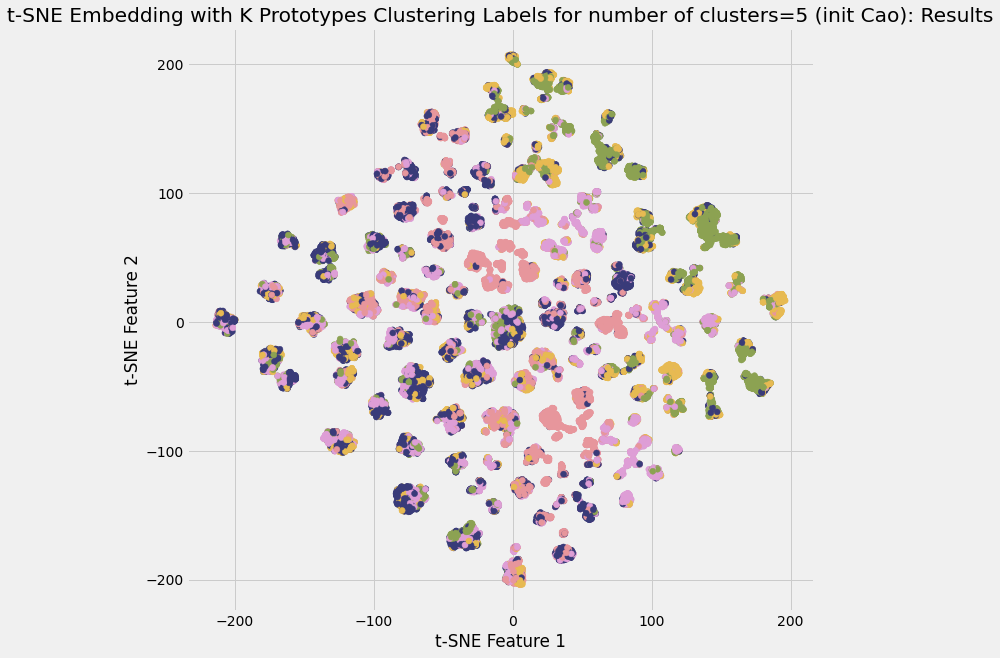

In [75]:
# Visualize the clustering results
plt.figure(figsize=(10, 10))
plt.scatter(loaded_array[:, 0], loaded_array[:, 1], c=clusters_proto_umap, cmap='tab20b')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Embedding with K Prototypes Clustering Labels for number of clusters=5 (init Cao): Results')
plt.show()

In [76]:
np.array(embedding)[0]

array([[7.663447 , 6.2013717],
       [5.793966 , 4.554733 ],
       [2.0159576, 8.523302 ],
       ...,
       [6.6226974, 8.732578 ],
       [4.8669043, 7.953975 ],
       [3.028095 , 8.041642 ]], dtype=float32)

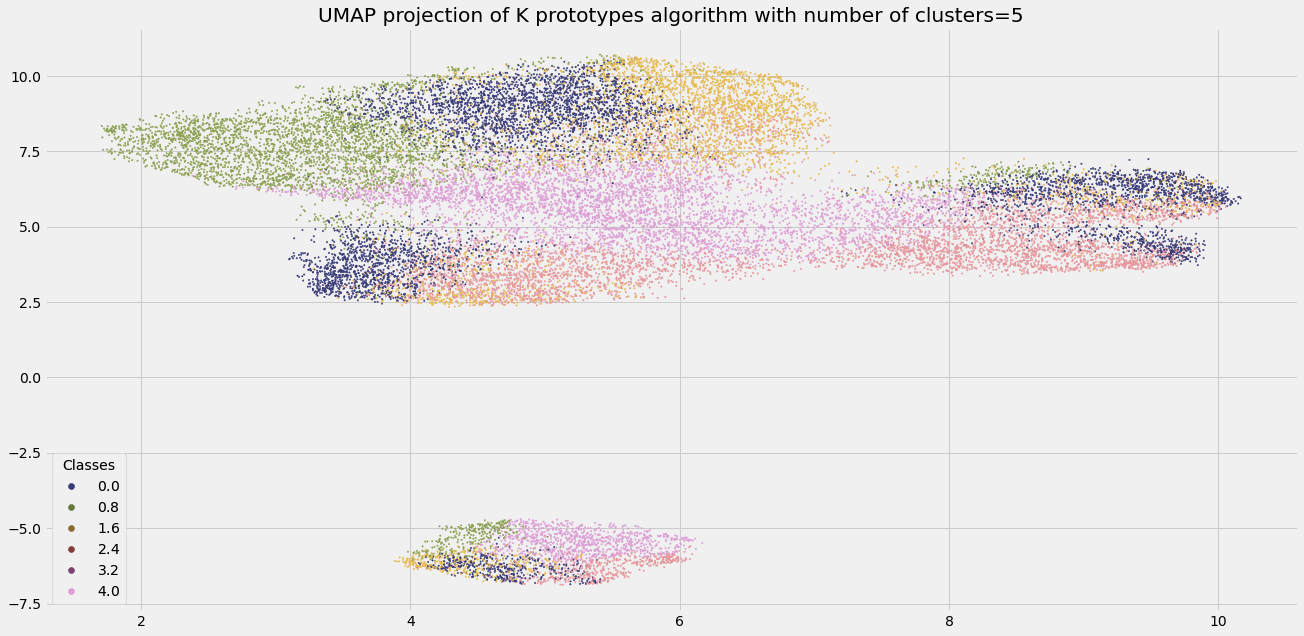

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(*np.array(embedding)[0].T, s=2, c=clusters_proto_umap, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
ax.title.set_text('UMAP projection of K prototypes algorithm with number of clusters=5')

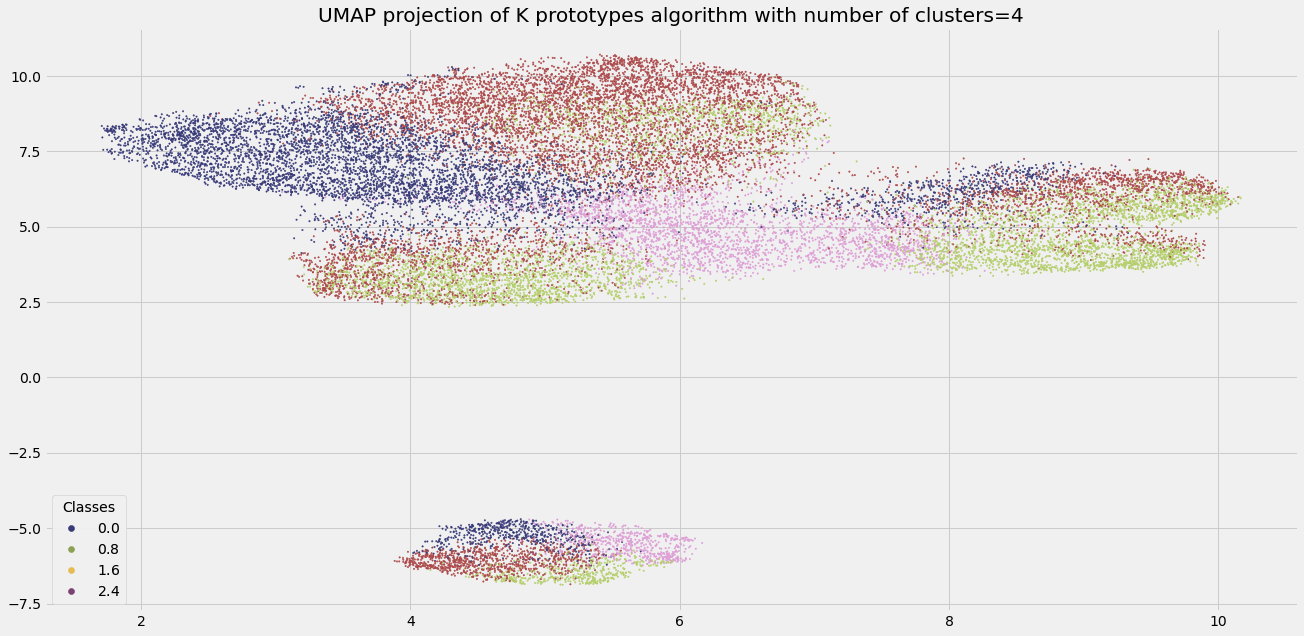

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(*np.array(embedding)[0].T, s=2, c=cluster_kproto3, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=4),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)
ax.title.set_text('UMAP projection of K prototypes algorithm with number of clusters=4')

In [92]:
cust_df=users.copy()

In [93]:
cust_df['Cluster']=clusters_proto_umap
cust_df.to_csv('cust_df.csv', index=False, float_format='%.2f', sep=';')

# HDBSCAN

In [82]:
import hdbscan

In [83]:
loaded_array.shape

(24998, 2)

In [84]:
# cast the dist_matrix array to a double array
loaded_array2 = loaded_array.astype(np.double)

In [86]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=500).fit(loaded_array2)

Text(0.5, 1.0, 'UMAP projection of HDBSCAN algorithm with number of clusters=4')

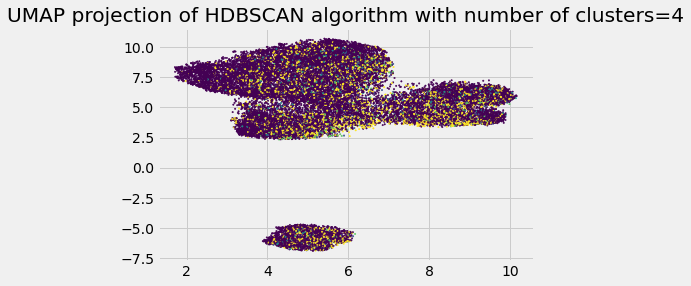

In [88]:
fig.set_size_inches((20, 10))
plt.scatter(*np.array(embedding)[0].T, c=clusterer.labels_,s=2)
plt.title('UMAP projection of HDBSCAN algorithm with number of clusters=4')

In [89]:
pd.Series(clusterer.labels_).value_counts()

-1    19712
 3     3729
 0      533
 1      516
 2      508
dtype: int64